# Complete Regression - Lab

## Introduction
By now, you have created all the necessary functions to calculate the slope, intercept, best-fit line, prediction, and visualizations. In this lab you will put them all together to run a regression experiment and calculate the model loss. 

## Objectives

You will be able to:

* Perform a linear regression using self-constructed functions
* Calculate the coefficient of determination using self-constructed functions
* Use the coefficient of determination to determine model performance

## The formulas

**Slope**: 
$\hat m = \dfrac{\overline{x}*\overline{y}-\overline{xy}}{(\overline{x})^2-\overline{x^2}}$


**Intercept**: $ \hat c = \bar{y} - \hat m\bar{x}$

**Prediction**: $\hat{y} = \hat mx + \hat c$

**R-Squared**: 
$ R^2 = 1- \dfrac{SS_{RES}}{SS_{TOT}} = 1 - \dfrac{\sum_i(y_i - \hat y_i)^2}{\sum_i(y_i - \overline y_i)^2} $


Use the Python functions created earlier to implement these formulas to run a regression analysis using x and y as input variables. 

In [33]:
# Combine all the functions created so far to run a complete regression experiment. 
# Produce an output similar to the one shown below. 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=np.float64)
Y = np.array([7, 7, 8, 9, 9, 10, 10, 11, 11, 12], dtype=np.float64)


In [38]:
def calc_slope(xs,ys):
    m = (np.mean(xs)*np.mean(ys) - np.mean(xs*ys)) / (np.mean(xs)**2 - np.mean(xs**2))
    return m  

def best_fit(xs, ys):
    m = calc_slope(xs, ys)
    c = np.mean(ys) - m*np.mean(xs)
    return c

def reg_line(m, c, X):
    return [(m*x) + c for x in X]

def sq_err(ys_real, ys_predicted):
    return np.sum((ys_real - ys_predicted)**2)

def r_squared(ys_real, ys_predicted):
    mean = np.mean(ys_real)
    srr = sq_err(ys_real, ys_predicted)
    sst = np.sum((ys_real - mean)**2)
    R2 = 1 - srr / sst
    return R2

In [39]:
m = calc_slope(X, Y)
c = best_fit(X, Y)
Y_predicted = reg_line(m, c, X)
R2 = r_squared(Y, Y_predicted)

print('Basic Regression Diagnostics')
print('Slope:', round(m, 2))
print('Y_Intercept:', round(c, 2))
print('R_Squared:', round(R2, 2))
print('Model: Y =', round(m, 2),'* X +', round(c, 2))

Basic Regression Diagnostics
Slope: 0.56
Y_Intercept: 6.33
R_Squared: 0.97
Model: Y = 0.56 * X + 6.33


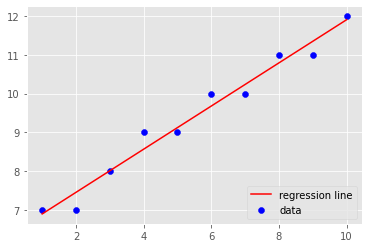

In [41]:
plt.scatter(X, Y, color='blue', label='data')
plt.plot(X, Y_predicted, color = 'red', label='regression line')
plt.legend(loc=4)
plt.show();

Basic Regression Diagnostics
----------------------------
Slope: 0.56
Y-Intercept: 6.33
R-Squared: 0.97
----------------------------
Model: Y = 0.56 * X + 6.33


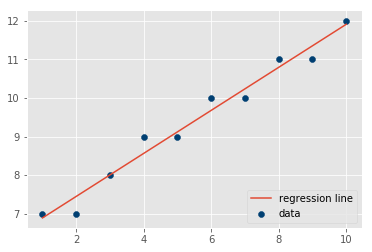

In [70]:
# Basic Regression Diagnostics
# ----------------------------
# Slope: 0.56
# Y-Intercept: 6.33
# R-Squared: 0.97
# ----------------------------
# Model: Y = 0.56 * X + 6.33

## Make Predictions

Predict and plot the value of y using regression line above for a new value of $x = 4.5$.

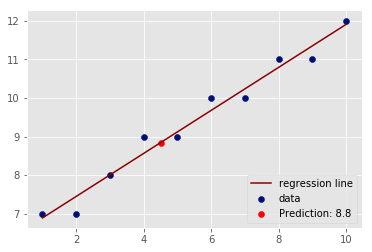

In [66]:
# Make prediction for x = 4.5 and visualize on the scatter plot

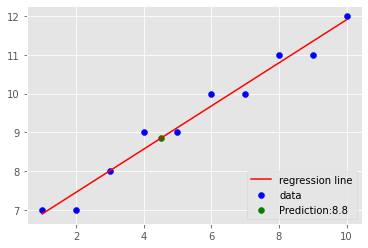

In [45]:
x_new = 4.5
y_new = m *x_new + c
plt.scatter(X, Y, color='blue', label='data')
plt.plot(X, Y_predicted, color = 'red', label='regression line')
plt.scatter(x_new, y_new, color = 'green', label = 'Prediction:' + str(np.round(y_new, 1)))
plt.legend(loc = 4)

## Level up - Optional 
Load the "`heightweight.csv`" dataset. Use the height as an independent and weight as a dependent variable and draw a regression line to data using your code above. Calculate your R-Squared value for the model and try to predict new values of y. 

## Summary

In this lab, we ran a complete simple regression analysis experiment using functions created so far. Next up, you'll learn how you can use Python's built-in modules to perform similar analyses with a much higher level of sophistication. 

In [46]:
import pandas as pd
df = pd.read_csv("heightweight.csv")
df

,height,weight
0,68,165
1,71,201
2,61,140
3,69,170
4,71,192
5,58,125
6,72,195
7,73,205
8,58,115
9,74,210


In [50]:
x = df['height']
y = df['weight']

In [49]:
m = calc_slope(x, y)
c = best_fit(x, y)
y_predicted = reg_line(m, c, x)
R2 = r_squared(y, y_predicted)

print('Basic Regression Diagnostics')
print('Slope:', round(m, 2))
print('Y_Intercept:', round(c, 2))
print('R_Squared:', round(R2, 2))
print('Model: Y =', round(m, 2),'* X +', round(c, 2))

Basic Regression Diagnostics
Slope: 5.54
Y_Intercept: -204.48
R_Squared: 0.96
Model: Y = 5.54 * X + -204.48


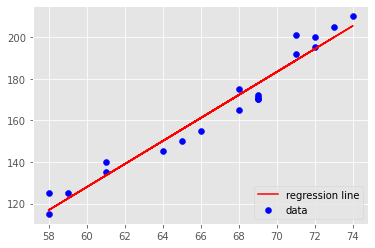

In [51]:
plt.scatter(x, y, color='blue', label='data')
plt.plot(x, y_predicted, color = 'red', label='regression line')
plt.legend(loc=4)
plt.show();